# PyMarek Day 4

Pandas marathon

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")
iris = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv", comment="#")
tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv", comment="#")
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv", comment="#")
weather = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz", comment="#")

In [2]:
# inheritance

class Dog:
    def __init__(self, name):
        self.name = name
    
    def bark(self):
        print("woof woof hau hau")
    
    def sit(self):
        print("OK.")
       

In [3]:
aramis = Dog("Aramis")

In [4]:
aramis.bark()

woof woof hau hau


In [5]:
aramis.sit()

OK.


In [6]:
class Husky(Dog): # each Huskey is a dog, Husky's superclass is Dog
    def __init__(self, name):
        super().__init__(name)
    
    def sit(self): # method overload
        print("No.")
    
    def pull_sleigh(self):
        print('My pleasure')

In [7]:
mishka = Husky("Mishka")

In [8]:
mishka.bark()

woof woof hau hau


In [9]:
mishka.sit()

No.


In [10]:
# aramis.pull_sleigh()

In [11]:
mishka.pull_sleigh()

My pleasure


In [12]:
# In pandas this is also used
tips.groupby('sex')

In [13]:
tips.groupby('sex').total_bill

In [14]:
tips.groupby('sex')['total_bill']

In [15]:
tips.groupby('sex')[['total_bill']]

In [16]:
tips.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [17]:
tips.groupby('sex').total_bill.mean()

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

In [18]:
tips.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Female,18.056897
Male,20.744076


In [19]:
# https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

In [20]:
x = tips.groupby('sex').total_bill
type(x)

pandas.core.groupby.groupby.SeriesGroupBy

In [21]:
type(x).__bases__

(pandas.core.groupby.groupby.GroupBy,)

In [22]:
type(tips.groupby('sex')).__bases__[0].__bases__

(pandas.core.groupby.groupby.GroupBy,)

In [23]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [24]:
weather.shape

(26130, 15)

In [25]:
weather.origin.unique()

array(['EWR', 'JFK', 'LGA'], dtype=object)

With the `weather` data frame from `nycflights13`:

      * Convert temperature to Celsius.
      * Compute daily mean temperatures for the `JFK` airport.
      If some hourly temperature measurements is missing,
      linearly interpolate between the preceding and following non-missing data,
      e.g., a temperature sequence of `[..., 10, NaN, NaN, 40, ...]`
      should be transformed to `[..., 10, 20, 30, 40, ...]`.
      * Present the daily mean temperatures on a plot.
      The x-axis labels should be human-readable and intuitive.
      * Choose days with greater mean temperature than in the preceding day.
      * Find 5 hottest days.

In [64]:
weather.temp = (weather.temp -32.0) * 5/9
weather.head(2)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00


In [ ]:
# fri

In [65]:
weather.shape

(26130, 15)

In [66]:
weather.temp.count()

26129

In [30]:
weather.loc[pd.isna(weather.temp),:]

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
5596,EWR,2013,8,22,13,NaN,NaN,NaN,240.0,12.65858,14.567241,0.03,NaN,4.0,2013-08-22 14:00:00


In [31]:
weather.iloc[5595:5598,:]

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
5595,EWR,2013,8,22,12,24.0,71.6,88.59,230.0,11.50780,13.242946,0.00,NaN,9.0,2013-08-22 13:00:00
5596,EWR,2013,8,22,13,NaN,NaN,NaN,240.0,12.65858,14.567241,0.03,NaN,4.0,2013-08-22 14:00:00
5597,EWR,2013,8,22,14,23.0,71.6,94.10,NaN,3.45234,3.972884,0.01,NaN,8.0,2013-08-22 15:00:00


In [32]:
weather.at[5596, 'temp'] = 23.5

In [33]:
weather.iloc[5595:5598,:]

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
5595,EWR,2013,8,22,12,24.0,71.6,88.59,230.0,11.50780,13.242946,0.00,NaN,9.0,2013-08-22 13:00:00
5596,EWR,2013,8,22,13,23.5,NaN,NaN,240.0,12.65858,14.567241,0.03,NaN,4.0,2013-08-22 14:00:00
5597,EWR,2013,8,22,14,23.0,71.6,94.10,NaN,3.45234,3.972884,0.01,NaN,8.0,2013-08-22 15:00:00


In [34]:
weather['date'] = [pd.to_datetime(d).date() for d in weather['time_hour']]

In [59]:
weather['date2'] = pd.to_datetime(weather['time_hour']).dt.date

In [57]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,date,temp_increase,date2
0,EWR,2013,1,1,0,2.8,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00,2013-01-01,NaN,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00,2013-01-01,NaN,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00,2013-01-01,NaN,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00,2013-01-01,NaN,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00,2013-01-01,NaN,2013-01-01 05:00:00


In [36]:
jfk = weather.loc[weather.origin == 'JFK',:]

<function matplotlib.pyplot.show(*args, **kw)>

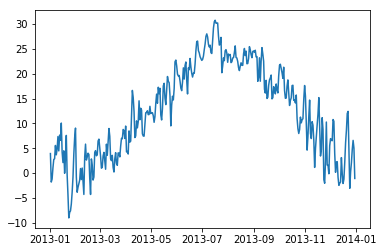

In [38]:
import matplotlib.pyplot as plt
jfk_mean_temp = jfk.groupby('date').temp.mean()
plt.plot(jfk_mean_temp)
plt.show

In [46]:
weather_by_date = weather.groupby('date').mean()
weather_by_date['temp_increase'] = weather_by_date.temp.gt(weather_by_date.temp.shift())
weather_by_date.loc[:,['temp','temp_increase']].head()

,temp,temp_increase
date,,
2013-01-01,3.927273,False
2013-01-02,-1.762500,False
2013-01-03,-1.308333,True
2013-01-04,1.144444,True
2013-01-05,2.793056,True


In [68]:
weather_by_date.loc[weather_by_date['temp_increase'],'temp'].head()

date
2013-01-03   -1.308333
2013-01-04    1.144444
2013-01-05    2.793056
2013-01-06    3.409722
2013-01-07    5.511111
Name: temp, dtype: float64

In [54]:
weather_by_date.loc[:,['temp']].sort_values(['temp'], ascending=False).head()

,temp
date,
2013-07-19,32.241667
2013-07-18,31.304167
2013-07-20,31.050000
2013-07-17,30.788889
2013-07-16,30.570833


In [ ]:
weather.tempC.interpolate(method='Linear', axis=0, limit_area='inside')

## SQL connectivity

In [71]:
import sqlite3 # zero-conf, lightweight, flat-file DB

In [73]:
conn = sqlite3.connect('/tmp/nycflight13.sqlite')

In [74]:
conn

In [75]:
weather = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz",
                          comment="#")
flights = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_flights.csv.gz",
                          comment="#")
airports = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_airports.csv.gz",
                          comment="#")
airlines = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_airlines.csv.gz",
                          comment="#")
planes = pd.read_csv(
    "http://www.gagolewski.com/resources/data/nycflights13_planes.csv.gz",
                          comment="#")

In [76]:
flights.shape

(336776, 19)

In [78]:
flights.head(1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00


In [79]:
airlines.head(1)

,carrier,name
0,9E,Endeavor Air Inc.


In [81]:
airlines.query('carrier == "UA"')

,carrier,name
11,UA,United Air Lines Inc.


In [83]:
planes.query('tailnum=="N14228"')

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
177,N14228,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan


In [84]:
airports.query('faa=="EWR"')

,faa,name,lat,lon,alt,tz,dst,tzone
460,EWR,Newark Liberty Intl,40.6925,-74.168667,18,-5,A,America/New_York


In [85]:
# let's use a low-level Python interface to export airlines to SQL db
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [86]:
conn.execute('''
CREATE TABLE airlines_temp (
    carrier CHAR(2) PRIMARY KEY,
    name VARCHAR(64)
)
''')

conn.commit()

In [88]:
list(airlines.to_records(index=False))[:3]

[('9E', 'Endeavor Air Inc.'),
 ('AA', 'American Airlines Inc.'),
 ('AS', 'Alaska Airlines Inc.')]

In [90]:
conn.executemany('''
INSERT INTO airlines_temp (carrier, name) VALUES (?,?)
''', airlines.to_records(index=False))

conn.commit()

In [91]:
cur = conn.execute("SELECT * FROM airlines_temp WHERE name LIKE '%america%'")
res = cur.fetchall()

In [92]:
res

[('AA', 'American Airlines Inc.'), ('VX', 'Virgin America')]

In [93]:
pd.DataFrame.from_records(res)

,0,1
0,AA,American Airlines Inc.
1,VX,Virgin America


## Pandas interface to SQL

In [95]:
# import sqlite3
# conn = sqlite3.connect("/temp/nycflight13.sqLite")

weather.to_sql("weather", conn)
flights.to_sql("flights", conn)
airports.to_sql("airports", conn)
airlines.to_sql("airlines", conn)
planes.to_sql("planes", conn)
# CREATE TABLE, INSERT INTO

In [96]:
pd.read_sql_query('''
SELECT * FROM airlines WHERE name LIKE "%america%"
''', conn)

,index,carrier,name
0,1,AA,American Airlines Inc.
1,13,VX,Virgin America


Marek Gagolewski:
   1. `SELECT DISTINCT engine FROM planes`
   2. `SELECT DISTINCT type, engine FROM planes`
   3. `SELECT COUNT(*), engine FROM planes GROUP BY engine`
   4. `SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type`
   5. `SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer`

In [99]:
pd.read_sql_query('''
SELECT DISTINCT engine FROM planes
''', conn)

,engine
0,Turbo-fan
1,Turbo-jet
2,Reciprocating
3,4 Cycle
4,Turbo-shaft
5,Turbo-prop


In [146]:
planes.head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan


In [147]:
pd.DataFrame(planes.engine.unique(), columns=['engine'])

,engine
0,Turbo-fan
1,Turbo-jet
2,Reciprocating
3,4 Cycle
4,Turbo-shaft
5,Turbo-prop


In [111]:
pd.read_sql_query('''
SELECT DISTINCT type, engine FROM planes
''', conn)

,type,engine
0,Fixed wing multi engine,Turbo-fan
1,Fixed wing multi engine,Turbo-jet
2,Fixed wing single engine,Reciprocating
3,Fixed wing multi engine,Reciprocating
4,Fixed wing single engine,4 Cycle
5,Rotorcraft,Turbo-shaft
6,Fixed wing multi engine,Turbo-prop


In [114]:
planes.groupby(['type', 'engine']).count().reset_index().loc[:,['type', 'engine']]

,type,engine
0,Fixed wing multi engine,Reciprocating
1,Fixed wing multi engine,Turbo-fan
2,Fixed wing multi engine,Turbo-jet
3,Fixed wing multi engine,Turbo-prop
4,Fixed wing single engine,4 Cycle
5,Fixed wing single engine,Reciprocating
6,Rotorcraft,Turbo-shaft


In [116]:
pd.read_sql_query('''
SELECT COUNT(*), engine FROM planes GROUP BY engine
''', conn)

,COUNT(*),engine
0,2,4 Cycle
1,28,Reciprocating
2,2750,Turbo-fan
3,535,Turbo-jet
4,2,Turbo-prop
5,5,Turbo-shaft


In [148]:
planes.groupby('engine').size().rename('count').reset_index()

,engine,count
0,4 Cycle,2
1,Reciprocating,28
2,Turbo-fan,2750
3,Turbo-jet,535
4,Turbo-prop,2
5,Turbo-shaft,5


In [152]:
planes.reset_index().loc[:,['index','engine']].groupby('engine').count().reset_index()

,engine,index
0,4 Cycle,2
1,Reciprocating,28
2,Turbo-fan,2750
3,Turbo-jet,535
4,Turbo-prop,2
5,Turbo-shaft,5


In [125]:
pd.read_sql_query('''
SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type
''', conn)

,COUNT(*),engine,type
0,2,4 Cycle,Fixed wing single engine
1,5,Reciprocating,Fixed wing multi engine
2,23,Reciprocating,Fixed wing single engine
3,2750,Turbo-fan,Fixed wing multi engine
4,535,Turbo-jet,Fixed wing multi engine
5,2,Turbo-prop,Fixed wing multi engine
6,5,Turbo-shaft,Rotorcraft


In [153]:
planes.groupby(['engine', 'type']).size().rename('count').reset_index()

,engine,type,count
0,4 Cycle,Fixed wing single engine,2
1,Reciprocating,Fixed wing multi engine,5
2,Reciprocating,Fixed wing single engine,23
3,Turbo-fan,Fixed wing multi engine,2750
4,Turbo-jet,Fixed wing multi engine,535
5,Turbo-prop,Fixed wing multi engine,2
6,Turbo-shaft,Rotorcraft,5


In [126]:
planes.reset_index().loc[:,['index','engine','type']].groupby(['engine', 'type']).count().reset_index()

,engine,type,index
0,4 Cycle,Fixed wing single engine,2
1,Reciprocating,Fixed wing multi engine,5
2,Reciprocating,Fixed wing single engine,23
3,Turbo-fan,Fixed wing multi engine,2750
4,Turbo-jet,Fixed wing multi engine,535
5,Turbo-prop,Fixed wing multi engine,2
6,Turbo-shaft,Rotorcraft,5


In [155]:
pd.read_sql_query('''
SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer
''', conn)

,MIN(year),AVG(year),MAX(year),engine,manufacturer
0,1975.0,1975.000000,1975.0,4 Cycle,CESSNA
1,NaN,NaN,NaN,4 Cycle,JOHN G HESS
2,NaN,NaN,NaN,Reciprocating,AMERICAN AIRCRAFT INC
3,2007.0,2007.000000,2007.0,Reciprocating,AVIAT AIRCRAFT INC
4,NaN,NaN,NaN,Reciprocating,BARKER JACK L
5,1959.0,1971.142857,1983.0,Reciprocating,CESSNA
6,2007.0,2007.000000,2007.0,Reciprocating,CIRRUS DESIGN CORP
7,1959.0,1959.000000,1959.0,Reciprocating,DEHAVILLAND
8,1956.0,1956.000000,1956.0,Reciprocating,DOUGLAS
9,2007.0,2007.000000,2007.0,Reciprocating,FRIEDEMANN JON


In [158]:
planes.loc[:,['year','engine','manufacturer']].groupby(['engine', 'manufacturer']).agg({
                         'year':['min', 'max', 'mean']})['year']

min     max         mean
engine        manufacturer                                              
4 Cycle       CESSNA                         1975.0  1975.0  1975.000000
              JOHN G HESS                       NaN     NaN          NaN
Reciprocating AMERICAN AIRCRAFT INC             NaN     NaN          NaN
              AVIAT AIRCRAFT INC             2007.0  2007.0  2007.000000
              BARKER JACK L                     NaN     NaN          NaN
              CESSNA                         1959.0  1983.0  1971.142857
              CIRRUS DESIGN CORP             2007.0  2007.0  2007.000000
              DEHAVILLAND                    1959.0  1959.0  1959.000000
              DOUGLAS                        1956.0  1956.0  1956.000000
              FRIEDEMANN JON                 2007.0  2007.0  2007.000000
              HURLEY JAMES LARRY                NaN     NaN          NaN
              KILDALL GARY                   1985.0  1985.0  1985.000000
              LAMBERT RICHARD                   NaN     NaN          NaN
              LEBLANC GLENN T                1985.0  1985.0  1985.000000
              MARZ BARRY                     1993.0  1993.0  1993.000000
              PAIR MIKE E                       NaN     NaN          NaN
              PIPER                          1968.0  1980.0  1976.400000
              STEWART MACO                   1985.0  1985.0  1985.000000
Turbo-fan     AIRBUS                         2002.0  2013.0  2007.281734
              AIRBUS INDUSTRIE               1992.0  2013.0  1998.599251
              AVIONS MARCEL DASSAULT         1986.0  1986.0  1986.000000
              BOEING                         1965.0  2013.0  2001.210400
              BOMBARDIER INC                 1998.0  2013.0  2004.486188
              CANADAIR                       1997.0  1998.0  1997.333333
              CESSNA                         1979.0  1979.0  1979.000000
              EMBRAER                        1998.0  2013.0  2003.613014
              GULFSTREAM AEROSPACE           1992.0  1992.0  1992.000000
              LEARJET INC                       NaN     NaN          NaN
              MCDONNELL DOUGLAS              1986.0  1997.0  1989.704545
              MCDONNELL DOUGLAS AIRCRAFT CO  1987.0  1993.0  1989.737864
Turbo-jet     AIRBUS                         2002.0  2002.0  2002.000000
              AIRBUS INDUSTRIE               1989.0  2004.0  1997.439024
              BOEING                         1984.0  2005.0  1996.368272
              CANADAIR LTD                   1974.0  1974.0  1974.000000
              EMBRAER                        1999.0  1999.0  1999.000000
              GULFSTREAM AEROSPACE           1976.0  1976.0  1976.000000
              MCDONNELL DOUGLAS              1975.0  1998.0  1990.714286
              MCDONNELL DOUGLAS CORPORATION  1991.0  1992.0  1991.928571
Turbo-prop    BEECH                          1967.0  1972.0  1969.500000
Turbo-shaft   AGUSTA SPA                     2001.0  2001.0  2001.000000
              BELL                           1975.0  1994.0  1984.500000
              ROBINSON HELICOPTER CO         2012.0  2012.0  2012.000000
              SIKORSKY                       1985.0  1985.0  1985.000000

Marek Gagolewski: Consider the birth_dates data set. Write a function that
returns the names of people which -- at a given date -- have already been born
but are less than 16 years of age.

Marek Gagolewski: birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")

In [143]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")

In [144]:
import datetime

In [145]:
birth_dates.head()

,Name,BirthDate
0,Hung Hyun-Seok,12.06.2000
1,Benno Blumenthal,31.12.1918
2,Paitoon Ornwimol,26.06.1958
3,P'yon Yong-Sun,10.07.1947
4,Étienne Chaney,04.09.1983


6. `SELECT * FROM planes WHERE speed IS NOT NULL`
   7. `SELECT tailnum FROM planes WHERE seats BETWEEN 150 AND 190 AND year >= 2012`
   8. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>390`
   9. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC`
   10. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC`

In [175]:
pd.read_sql_query('''
SELECT * FROM planes WHERE speed IS NOT NULL
''', conn).head()

,index,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,424,N201AA,1959.0,Fixed wing single engine,CESSNA,150,1,2,90.0,Reciprocating
1,427,N202AA,1980.0,Fixed wing multi engine,CESSNA,421C,2,8,90.0,Reciprocating
2,821,N350AA,1980.0,Fixed wing multi engine,PIPER,PA-31-350,2,8,162.0,Reciprocating
3,893,N364AA,1973.0,Fixed wing multi engine,CESSNA,310Q,2,6,167.0,Reciprocating
4,1027,N378AA,1963.0,Fixed wing single engine,CESSNA,172E,1,4,105.0,Reciprocating


In [ ]:
planes.loc[~planes.speed.isna(),:]

In [176]:
planes.query('speed != "Nan"').head(2).reset_index()

,index,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,424,N201AA,1959.0,Fixed wing single engine,CESSNA,150,1,2,90.0,Reciprocating
1,427,N202AA,1980.0,Fixed wing multi engine,CESSNA,421C,2,8,90.0,Reciprocating


In [178]:
pd.read_sql_query('''
SELECT tailnum FROM planes WHERE seats BETWEEN 150 AND 190 AND year >= 2012
''', conn).head(2)

,tailnum
0,N361VA
1,N849VA


In [198]:
planes.query('150 <= seats <= 190 and year >=2012').reset_index().loc[:,['tailnum']].head(2)

,tailnum
0,N361VA
1,N849VA


In [180]:
pd.read_sql_query('''
SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>390
''', conn).head(2)

,index,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,439,N206UA,1999.0,Fixed wing multi engine,BOEING,777-222,2,400,None,Turbo-fan
1,484,N228UA,2002.0,Fixed wing multi engine,BOEING,777-222,2,400,None,Turbo-fan


In [181]:
planes.query('manufacturer in ["BOEING", "AIRBUS", "EMBRAER"] and seats > 390').reset_index().head(2)

,index,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,439,N206UA,1999.0,Fixed wing multi engine,BOEING,777-222,2,400,NaN,Turbo-fan
1,484,N228UA,2002.0,Fixed wing multi engine,BOEING,777-222,2,400,NaN,Turbo-fan


In [183]:
pd.read_sql_query('''
SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC
''', conn).head(2)

,year,seats
0,2012.0,379
1,2012.0,377


In [197]:
(
    planes.query('year >= 2012').groupby(['year', 'seats']).mean().reset_index().loc[:,['year', 'seats']]
    .sort_values(['year','seats'], ascending=[True,False]).reset_index(drop=True).head(5)
)

,year,seats
0,2012.0,379
1,2012.0,377
2,2012.0,260
3,2012.0,222
4,2012.0,200


In [201]:
(
    planes.query('year >= 2012').loc[:,['year', 'seats']].drop_duplicates()
    .sort_values(['year','seats'], ascending=[True,False]).reset_index(drop=True).head(5)
)

,year,seats
0,2012.0,379
1,2012.0,377
2,2012.0,260
3,2012.0,222
4,2012.0,200


In [192]:
pd.read_sql_query('''
SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC
''', conn).head(2)

,year,seats
0,2012.0,379
1,2013.0,379


In [196]:
(
    planes.query('year >= 2012').groupby(['year', 'seats']).mean().reset_index().loc[:,['year', 'seats']]
    .sort_values(['seats','year'], ascending=[False,True]).reset_index(drop=True).head(5)
)

,year,seats
0,2012.0,379
1,2013.0,379
2,2012.0,377
3,2013.0,377
4,2012.0,260


11. SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer
12. SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10
13. SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer HAVING COUNT(*) > 10
14. SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 5

In [223]:
pd.read_sql_query('''
SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer
''', conn)

,manufacturer,COUNT(*)
0,AIRBUS,66
1,AIRBUS INDUSTRIE,4
2,BOEING,225


In [224]:
planes.query('seats > 200').groupby('manufacturer').size().reset_index()

,manufacturer,0
0,AIRBUS,66
1,AIRBUS INDUSTRIE,4
2,BOEING,225


In [222]:
pd.read_sql_query('''
SELECT manufacturer, COUNT() FROM planes GROUP BY manufacturer HAVING COUNT() > 10
''', conn)

,manufacturer,COUNT()
0,AIRBUS,336
1,AIRBUS INDUSTRIE,400
2,BOEING,1630
3,BOMBARDIER INC,368
4,EMBRAER,299
5,MCDONNELL DOUGLAS,120
6,MCDONNELL DOUGLAS AIRCRAFT CO,103
7,MCDONNELL DOUGLAS CORPORATION,14


In [233]:
planes.groupby('manufacturer').size().rename('count').reset_index().query('count > 10').reset_index(drop=True)

,manufacturer,count
0,AIRBUS,336
1,AIRBUS INDUSTRIE,400
2,BOEING,1630
3,BOMBARDIER INC,368
4,EMBRAER,299
5,MCDONNELL DOUGLAS,120
6,MCDONNELL DOUGLAS AIRCRAFT CO,103
7,MCDONNELL DOUGLAS CORPORATION,14


In [220]:
pd.read_sql_query('''
SELECT manufacturer, COUNT() FROM planes WHERE seats > 200 GROUP BY manufacturer HAVING COUNT() > 10
''', conn)

,manufacturer,COUNT()
0,AIRBUS,66
1,BOEING,225


In [232]:
(
    planes.query('seats > 200').groupby('manufacturer').size().rename('count').reset_index().
    query('count > 10').reset_index(drop=True)
)

,manufacturer,count
0,AIRBUS,66
1,BOEING,225


In [219]:
pd.read_sql_query('''
SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 5
''', conn).head(5)

,manufacturer,howmany
0,BOEING,1630
1,AIRBUS INDUSTRIE,400
2,BOMBARDIER INC,368
3,AIRBUS,336
4,EMBRAER,299


In [235]:
planes.groupby('manufacturer').size().rename('howmany').sort_values(ascending=False).reset_index().head(5)


,manufacturer,howmany
0,BOEING,1630
1,AIRBUS INDUSTRIE,400
2,BOMBARDIER INC,368
3,AIRBUS,336
4,EMBRAER,299


In [236]:
planes.groupby('manufacturer').size().rename('howmany').nlargest(5).reset_index()

,manufacturer,howmany
0,BOEING,1630
1,AIRBUS INDUSTRIE,400
2,BOMBARDIER INC,368
3,AIRBUS,336
4,EMBRAER,299


15. `SELECT * FROM flights LEFT JOIN planes ON flights.tailnum=planes.tailnum`
16. ```
      SELECT planes.*, airlines.* FROM
       (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail
      INNER JOIN planes ON cartail.tailnum=planes.tailnum
      INNER JOIN airlines ON cartail.carrier=airlines.carrier
      ```
   17.

      ```
      SELECT flights2.*, weather2.atemp, weather2.ahumid, weather2.apressure FROM
         (SELECT * FROM flights WHERE origin='EWR') AS flights2
      LEFT JOIN
         (SELECT year, month, day, AVG(temp) AS atemp,
           AVG(humid) AS ahumid, AVG(pressure) AS apressure
          FROM weather WHERE origin='EWR' GROUP BY year, month, day) AS weather2
      ON flights2.year=weather2.year
        AND flights2.month=weather2.month
        AND flights2.day=weather2.day
      ```

In [237]:
pd.read_sql_query('''
SELECT * FROM flights LEFT JOIN planes ON flights.tailnum=planes.tailnum
''', conn).head(5)

,index,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,index,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,177.0,N14228,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,515.0,N24211,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1880.0,N619AA,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,2554.0,N804JB,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,2088.0,N668DN,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan


In [281]:
flights.join(planes.set_index('tailnum'), on='tailnum', lsuffix='_left', rsuffix='_right')
#flights.set_index('tailnum').join(planes.set_index('tailnum'))

,year_left,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_right,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,15,2013-01-01 05:00:00,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,29,2013-01-01 05:00:00,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,40,2013-01-01 05:00:00,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,45,2013-01-01 05:00:00,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,0,2013-01-01 06:00:00,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,58,2013-01-01 05:00:00,2012.0,Fixed wing multi engine,BOEING,737-924ER,2.0,191.0,NaN,Turbo-fan
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,0,2013-01-01 06:00:00,2000.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2.0,200.0,NaN,Turbo-fan
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,0,2013-01-01 06:00:00,1998.0,Fixed wing multi engine,CANADAIR,CL-600-2B19,2.0,55.0,NaN,Turbo-fan
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,0,2013-01-01 06:00:00,2004.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,0,2013-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
pd.read_sql_query('''
SELECT planes.*, airlines.* FROM
   (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail
  INNER JOIN planes ON cartail.tailnum=planes.tailnum
  INNER JOIN airlines ON cartail.carrier=airlines.carrier
''', conn).head(5)

,index,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,index,carrier,name
0,0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,5,EV,ExpressJet Airlines Inc.
1,1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
2,2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
3,3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
4,4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan,5,EV,ExpressJet Airlines Inc.


In [263]:
cartail = flights.drop_duplicates(['carrier','tailnum']).loc[:,['tailnum','carrier']]
(
    cartail.join(planes.set_index('tailnum'), on='tailnum', lsuffix='_left', rsuffix='_right')
    .join(airlines.set_index('carrier'), on='carrier', lsuffix='_l', rsuffix='_r')
    .reset_index().head()
)


,index,tailnum,carrier,year,type,manufacturer,model,engines,seats,speed,engine,name
0,0,N14228,UA,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,United Air Lines Inc.
1,1,N24211,UA,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,United Air Lines Inc.
2,2,N619AA,AA,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan,American Airlines Inc.
3,3,N804JB,B6,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan,JetBlue Airways
4,4,N668DN,DL,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan,Delta Air Lines Inc.


In [282]:
(
    flights.loc[:,['carrier','tailnum']].drop_duplicates().merge(airlines, on='carrier', how='inner')
    .merge(planes, on='tailnum', how='inner').head(5)
)

,carrier,tailnum,name,year,type,manufacturer,model,engines,seats,speed,engine
0,UA,N14228,United Air Lines Inc.,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
1,UA,N24211,United Air Lines Inc.,1998.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
2,UA,N39463,United Air Lines Inc.,2012.0,Fixed wing multi engine,BOEING,737-924ER,2,191,NaN,Turbo-fan
3,UA,N29129,United Air Lines Inc.,1998.0,Fixed wing multi engine,BOEING,757-224,2,178,NaN,Turbo-jet
4,UA,N53441,United Air Lines Inc.,NaN,Fixed wing multi engine,BOEING,737-924ER,2,191,NaN,Turbo-fan


In [266]:
pd.read_sql_query('''
SELECT flights2.*, weather2.atemp, weather2.ahumid, weather2.apressure FROM
     (SELECT * FROM flights WHERE origin='EWR') AS flights2
  LEFT JOIN
     (SELECT year, month, day, AVG(temp) AS atemp,
       AVG(humid) AS ahumid, AVG(pressure) AS apressure
      FROM weather WHERE origin='EWR' GROUP BY year, month, day) AS weather2
  ON flights2.year=weather2.year
    AND flights2.month=weather2.month
    AND flights2.day=weather2.day
''', conn).head(1)

,index,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,atemp,ahumid,apressure
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,38.48,58.386087,1012.442857


In [274]:
flights2 = flights.query('origin == "EWR"')
flights2 = flights2.set_index(['year', 'month', 'day'])
flights2

dep_time  sched_dep_time  dep_delay  arr_time  sched_arr_time  \
year month day                                                                  
2013 1     1       517.0             515        2.0     830.0             819   
           1       554.0             558       -4.0     740.0             728   
           1       555.0             600       -5.0     913.0             854   
           1       558.0             600       -2.0     923.0             937   
           1       559.0             600       -1.0     854.0             902   
           1       601.0             600        1.0     844.0             850   
           1       606.0             610       -4.0     858.0             910   
           1       607.0             607        0.0     858.0             915   
           1       608.0             600        8.0     807.0             735   
           1       615.0             615        0.0     833.0             842   
           1       622.0             630       -8.0    1017.0            1014   
           1       624.0             630       -6.0     909.0             840   
           1       628.0             630       -2.0    1016.0             947   
           1       629.0             630       -1.0     824.0             833   
           1       632.0             608       24.0     740.0             728   
           1       643.0             646       -3.0     922.0             940   
           1       643.0             645       -2.0     837.0             848   
           1       644.0             636        8.0     931.0             940   
           1       646.0             645        1.0    1023.0            1030   
           1       656.0             700       -4.0     948.0            1011   
           1       659.0             700       -1.0     959.0            1008   
           1       701.0             700        1.0    1123.0            1154   
           1       715.0             713        2.0     911.0             850   
           1       723.0             725       -2.0    1013.0            1017   
           1       724.0             725       -1.0    1020.0            1030   
           1       725.0             730       -5.0    1052.0            1040   
           1       727.0             730       -3.0     959.0             952   
           1       732.0             645       47.0    1011.0             941   
           1       739.0             739        0.0    1104.0            1038   
           1       746.0             746        0.0    1119.0            1129   
...                  ...             ...        ...       ...             ...   
     9     30     2010.0            2016       -6.0    2119.0            2128   
           30     2015.0            2015        0.0    2244.0            2307   
           30     2019.0            2023       -4.0    2225.0            2240   
           30     2021.0            2022       -1.0    2144.0            2200   
           30     2026.0            2028       -2.0    2317.0            2340   
           30     2030.0            2045      -15.0    2141.0            2153   
           30     2030.0            2035       -5.0    2324.0            2340   
           30     2033.0            2030        3.0    2143.0            2150   
           30     2034.0            2040       -6.0    2227.0            2248   
           30     2035.0            2029        6.0    2318.0            2337   
           30     2047.0            2059      -12.0    2222.0            2255   
           30     2052.0            2059       -7.0    2315.0            2358   
           30     2053.0            1815      158.0    2310.0            2054   
           30     2054.0            2056       -2.0    2249.0            2316   
           30     2055.0            2059       -4.0    2158.0            2211   
           30     2058.0            2105       -7.0    2217.0            2226   
           30     2059.0            2003       

In [291]:
flights2 = flights.query('origin == "EWR"').set_index(['year', 'month', 'day'])
weather2 = weather.query('origin == "EWR"').groupby(['year','month','day'])[['temp','humid','pressure']].mean()
weather2 = weather2.rename(index=str, columns={"temp": "atemp", "humid": "ahumid", "pressure": "apressure"})
flights2.merge(weather2, how='inner')  

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [289]:
flights2 = flights.query('origin == "EWR"').set_index(['year', 'month', 'day'])
weather2 = weather.query('origin == "EWR"').groupby(['year','month','day'])[['temp','humid','pressure']].mean()
weather2 = weather2.rename(index=str, columns={"temp": "atemp", "humid": "ahumid", "pressure": "apressure"}).reset_index()
flights2.merge(weather2, how='inner')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False